In [1]:
# importing modules needed

import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('299cfe16_TEST_LOOP_RAW_DATA.xlsx')

In [3]:
Data = df.copy()

In [4]:
processed = pd.DataFrame()
processed = df[['Data_pull_time', 'Mac_Id', 'Axis']]

In [5]:
processed['Max'] = Data.loc[:,'Vsample1':'Vsample4096'].max(axis=1)
processed['Min'] = Data.loc[:,'Vsample1':'Vsample4096'].min(axis=1)
processed['Mean'] = Data.loc[:,'Vsample1':'Vsample4096'].mean(axis=1)
processed['Std'] = Data.loc[:,'Vsample1':'Vsample4096'].std(axis=1)
processed['P2P'] = Data.loc[:,'Vsample1':'Vsample4096'].max(axis=1) - Data.loc[:,'Vsample1':'Vsample4096'].min(axis=1)
processed['Kurt'] = Data.loc[:,'Vsample1':'Vsample4096'].kurt(axis=1)
processed['RMS'] =  (Data.loc[:,'Vsample1':'Vsample4096']**2).mean().pow(1/2)
processed['Var'] = Data.loc[:,'Vsample1':'Vsample4096'].var(axis=1)

C:\Users\husssabe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\husssabe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\husssabe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [9]:
processed.head()
#processed.shape

,Data_pull_time,Mac_Id,Axis,Max,Min,Mean,Std,P2P,Kurt,RMS,Var
0,2020-08-31 08:34:36,29:9c:fe:16,X,1.562500,-1.578125,-0.113041,0.247268,3.140625,4.575574,NaN,0.061141
1,2020-08-31 09:07:45,29:9c:fe:16,X,2.546875,-1.578125,-0.111820,0.242782,4.125000,9.538769,NaN,0.058943
2,2020-08-31 09:32:04,29:9c:fe:16,X,2.343750,-2.781250,-0.115196,0.284595,5.125000,13.935236,NaN,0.080995
3,2020-08-31 11:07:56,29:9c:fe:16,X,3.296875,-3.531250,-0.112835,0.344579,6.828125,15.388989,NaN,0.118735
4,2020-08-31 11:48:18,29:9c:fe:16,X,2.453125,-2.265625,-0.114075,0.316491,4.718750,7.442110,NaN,0.100166


## K means clustering

In [7]:
points = processed[["RMS","P2P"]].values

In [8]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
model.fit(points)
labels = model.predict(points)
print(labels)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
xs = points[:,0]
ys = points[:,1]
plt.scatter(xs, ys, c=labels)
plt.show()

### Clustering of all data

In [10]:
All_data = pd.DataFrame()
for i in os.listdir(os.getcwd()):
    if i[-24:] == '_TEST_LOOP_RAW_DATA.xlsx':
        df_1by1 = pd.read_excel(i)
        # print(df_1by1.shape)
        All_data = All_data.append(df_1by1)

In [11]:
All_data.shape

(586, 4099)

In [12]:
all_prosd = pd.DataFrame()
all_prosd = All_data[['Data_pull_time', 'Mac_Id', 'Axis']]



In [13]:
all_prosd['Max'] = All_data.loc[:,'Vsample1':'Vsample4096'].max(axis=1)
all_prosd['Min'] = All_data.loc[:,'Vsample1':'Vsample4096'].min(axis=1)
all_prosd['Mean'] = All_data.loc[:,'Vsample1':'Vsample4096'].mean(axis=1)
all_prosd['Std'] = All_data.loc[:,'Vsample1':'Vsample4096'].std(axis=1)
all_prosd['P2P'] = All_data.loc[:,'Vsample1':'Vsample4096'].max(axis=1) - All_data.loc[:,'Vsample1':'Vsample4096'].min(axis=1)
all_prosd['Kurt'] = All_data.loc[:,'Vsample1':'Vsample4096'].kurt(axis=1)
all_prosd['RMS'] =  (All_data.loc[:,'Vsample1':'Vsample4096']**2).mean(1).pow(1/2)
all_prosd['Var'] = All_data.loc[:,'Vsample1':'Vsample4096'].var(axis=1)

C:\Users\husssabe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\husssabe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\husssabe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [14]:
#all_prosd.head()
all_prosd.describe()
#print(all_prosd.shape)

,Max,Min,Mean,Std,P2P,Kurt,RMS,Var
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,3.700299,-4.037809,-0.221792,0.457474,7.738108,15.121270,0.648795,0.280128
std,2.316271,2.654055,0.528636,0.266394,4.769796,20.578248,0.433145,0.415193
min,0.453125,-17.343750,-1.017944,0.088630,1.078125,-0.118013,0.095147,0.007855
25%,2.015625,-5.375000,-0.934562,0.261048,4.097656,4.009796,0.294872,0.068146
50%,3.218750,-3.570312,-0.036503,0.411463,6.789062,8.018094,0.462215,0.169302
75%,4.765625,-1.957031,0.043226,0.574833,10.152344,17.373515,1.088860,0.330433
max,17.250000,0.093750,1.053616,2.434060,34.593750,226.428363,2.613495,5.924650


In [19]:
from matplotlib.backends.backend_pdf import PdfPages



C:\Users\husssabe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\husssabe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\husssabe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed an

C:\Users\husssabe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\husssabe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\husssabe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed an

C:\Users\husssabe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\husssabe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\husssabe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed an

C:\Users\husssabe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\husssabe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\husssabe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed an

C:\Users\husssabe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\husssabe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\husssabe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed an

C:\Users\husssabe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\husssabe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\husssabe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed an

C:\Users\husssabe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\husssabe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\husssabe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed an

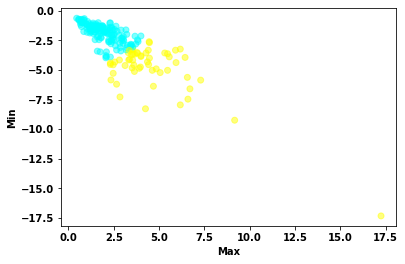

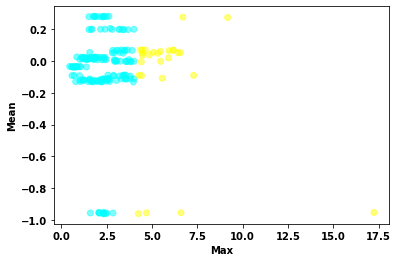

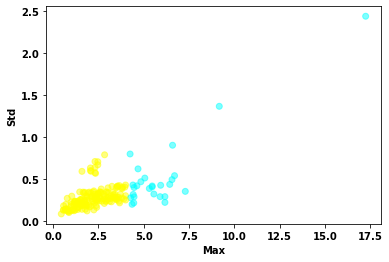

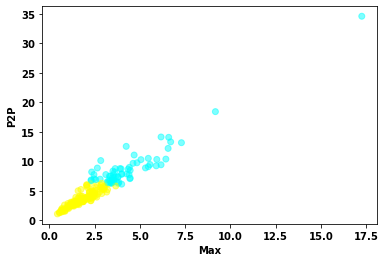

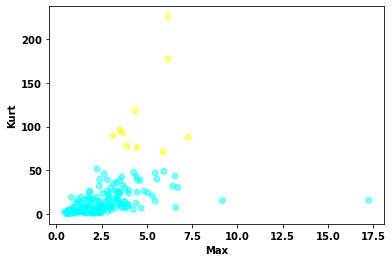

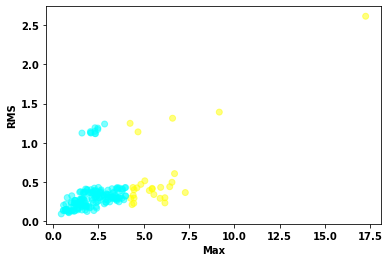

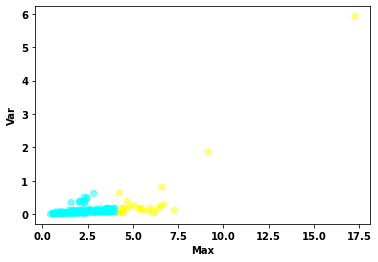

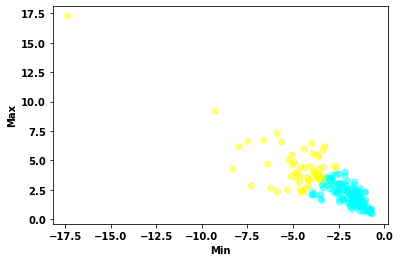

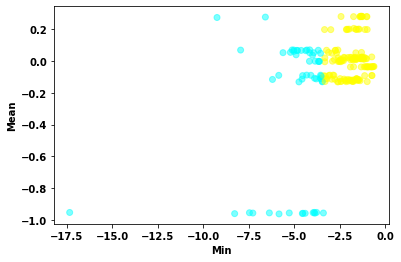

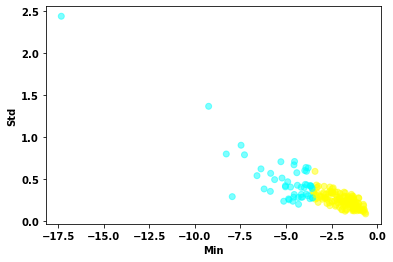

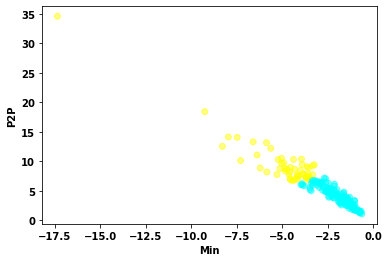

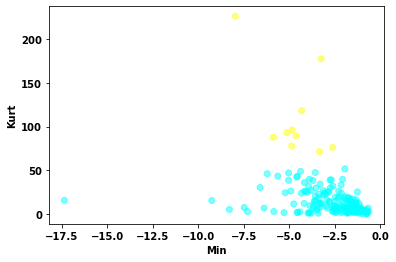

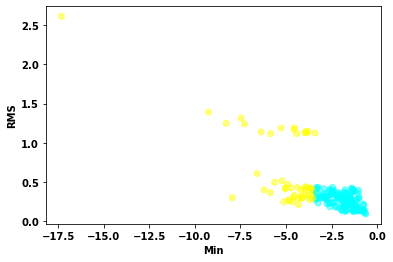

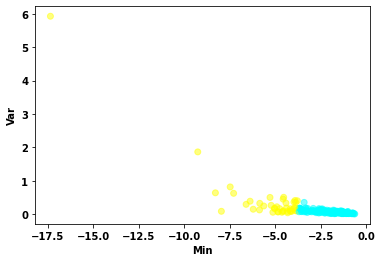

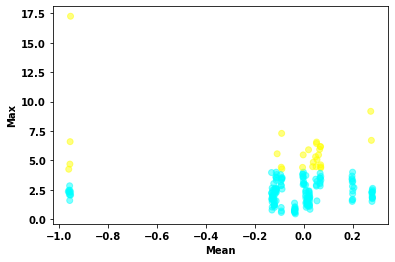

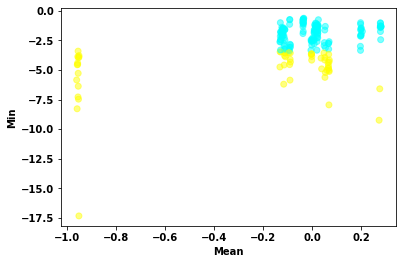

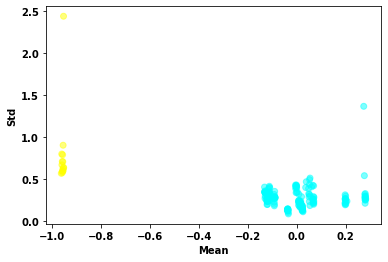

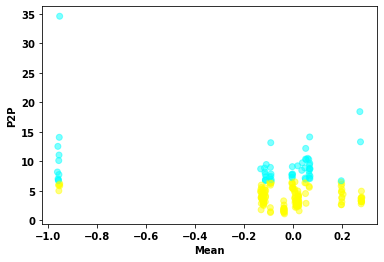

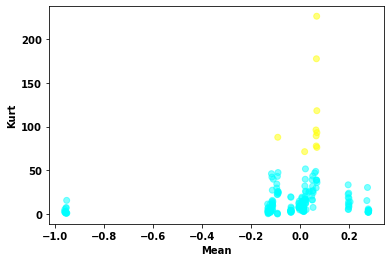

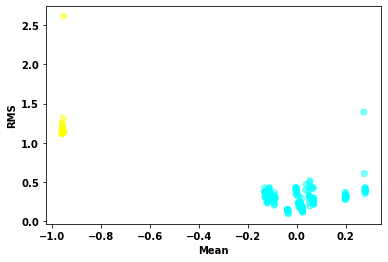

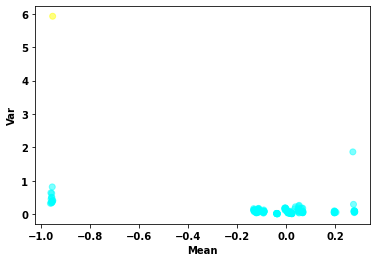

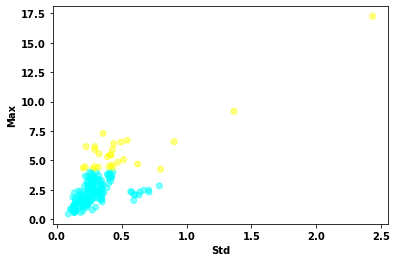

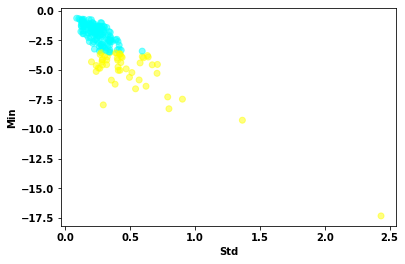

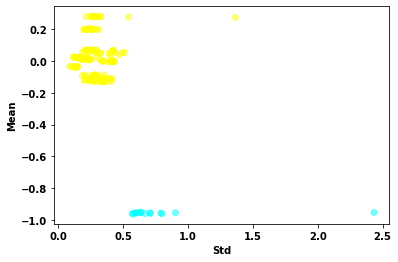

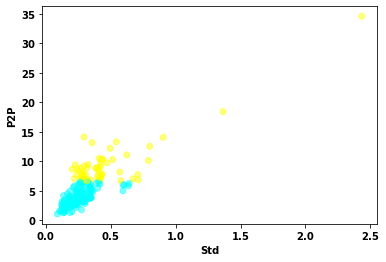

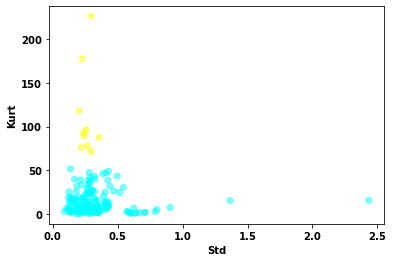

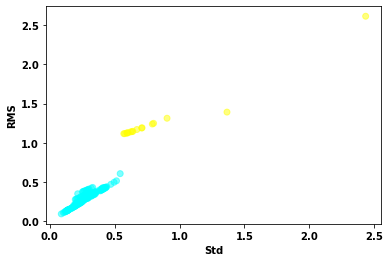

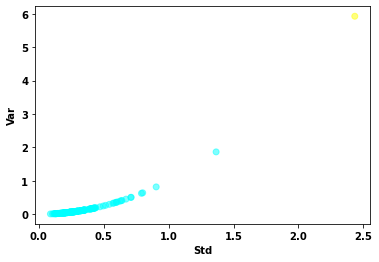

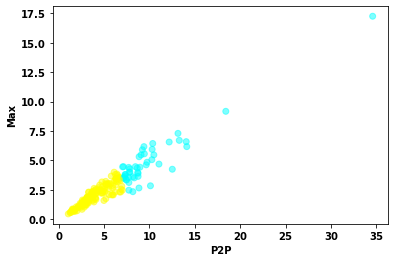

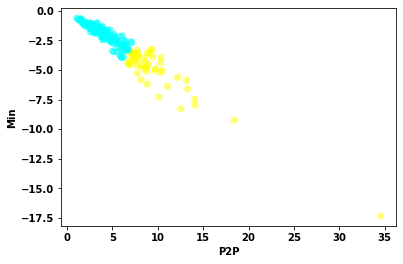

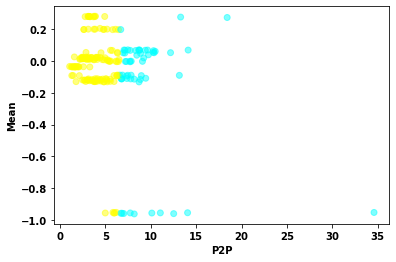

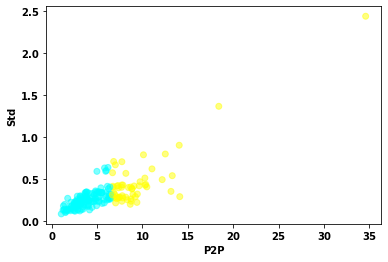

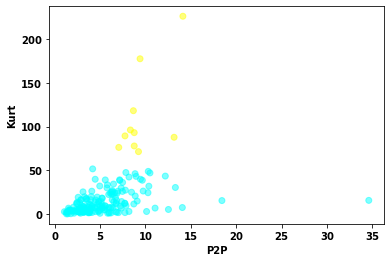

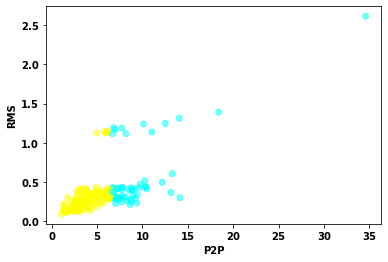

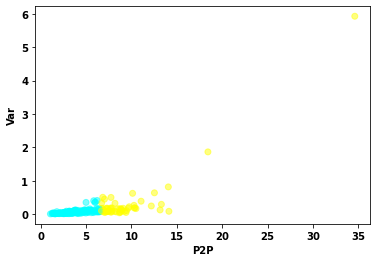

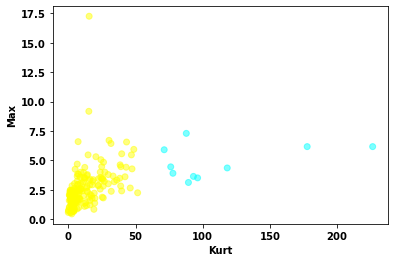

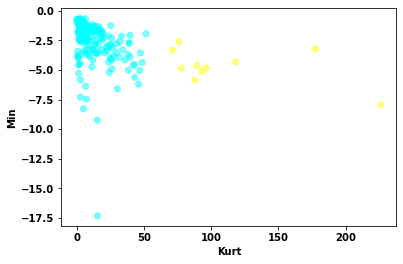

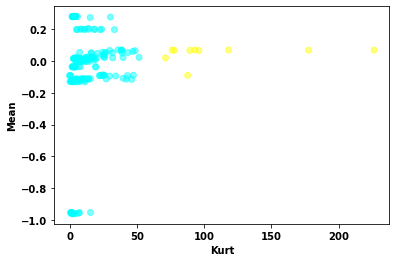

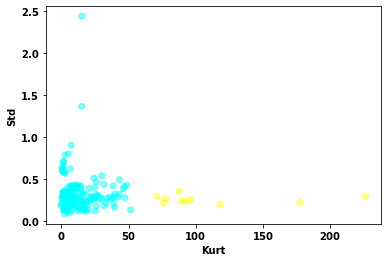

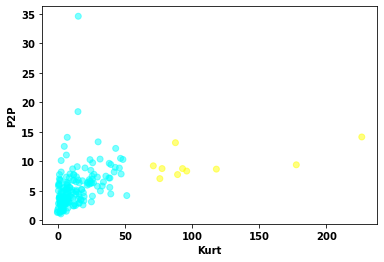

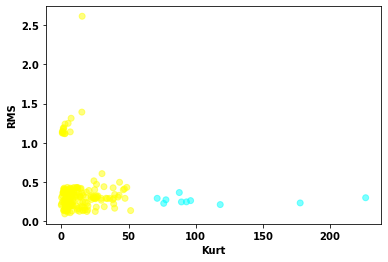

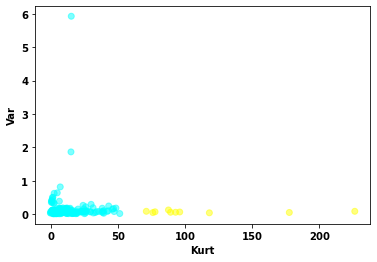

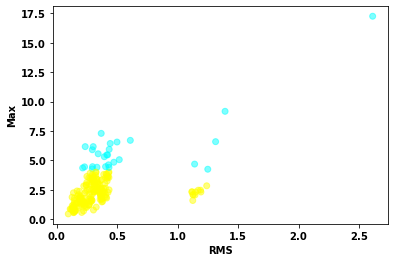

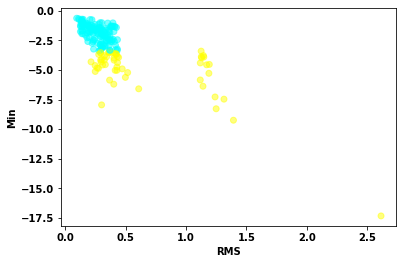

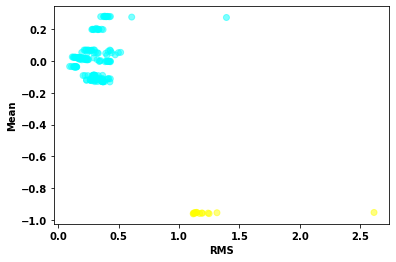

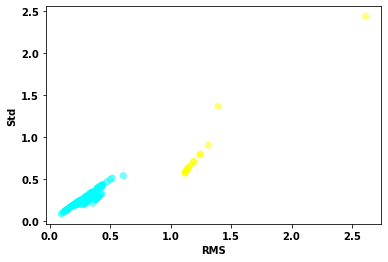

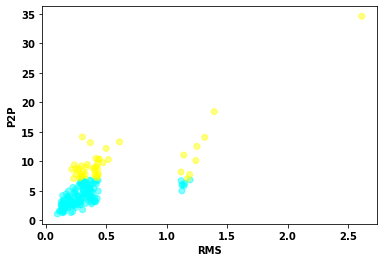

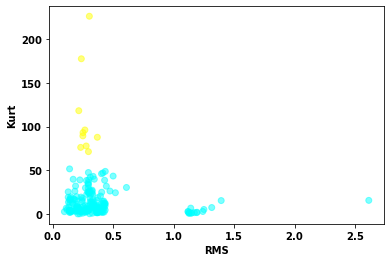

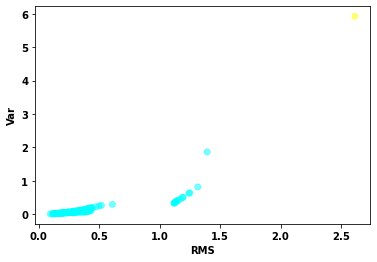

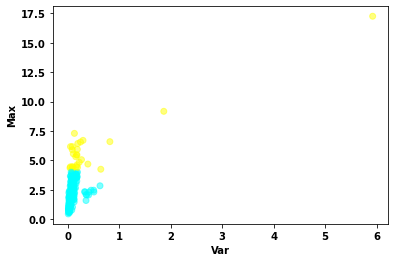

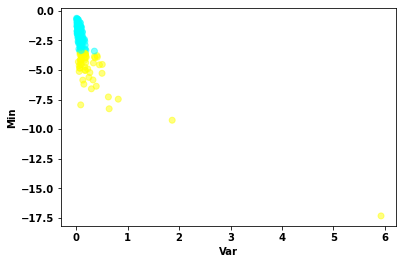

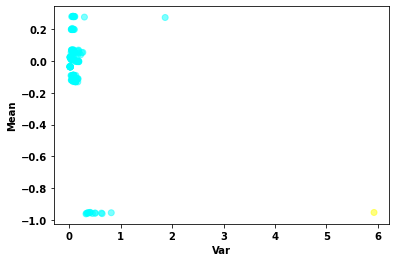

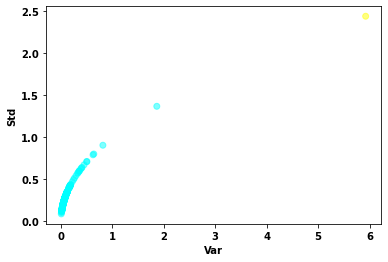

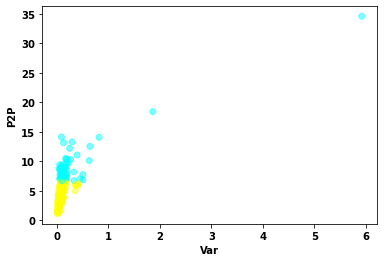

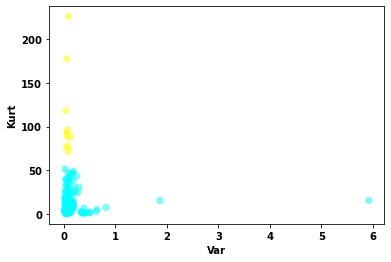

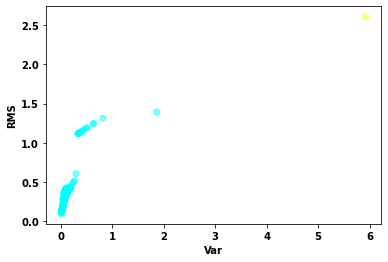

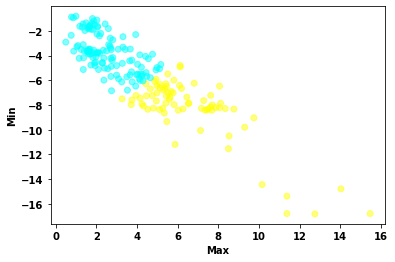

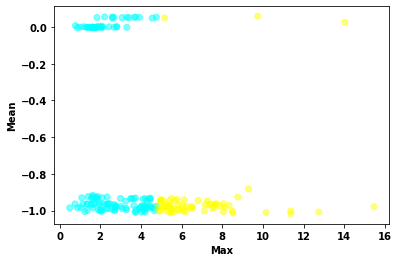

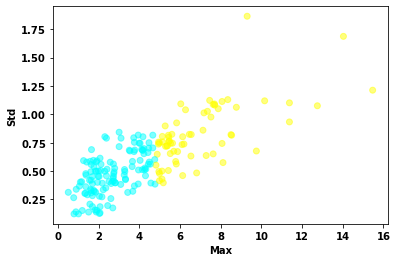

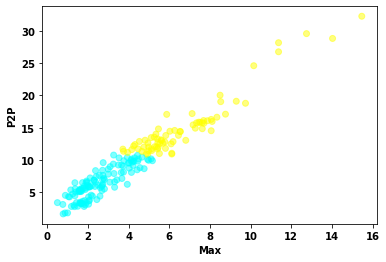

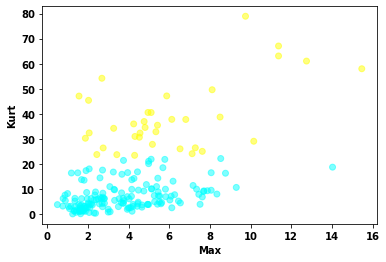

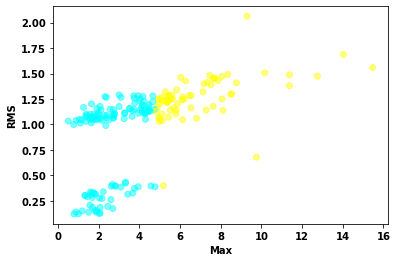

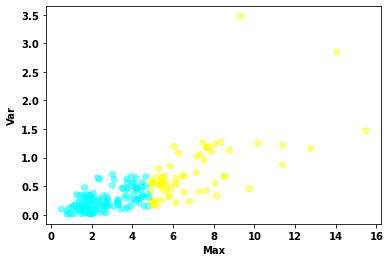

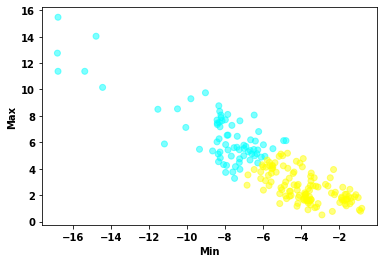

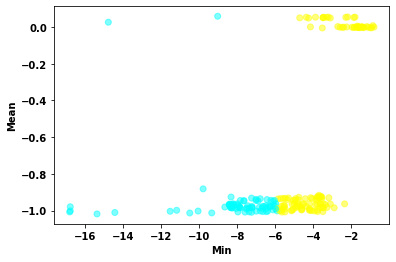

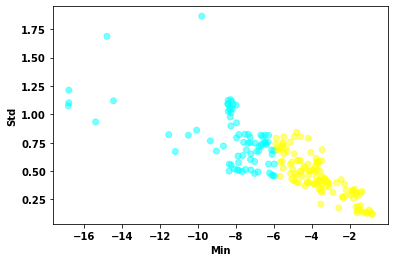

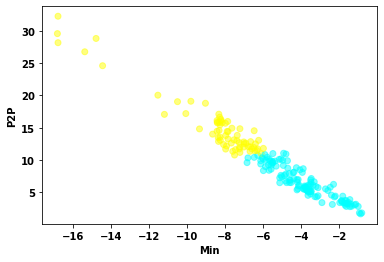

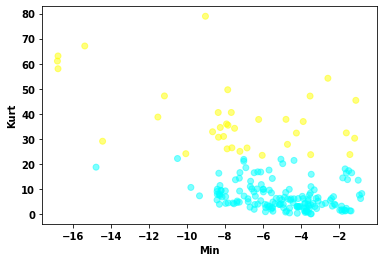

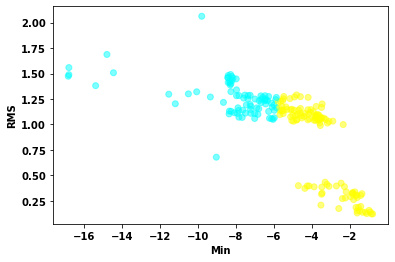

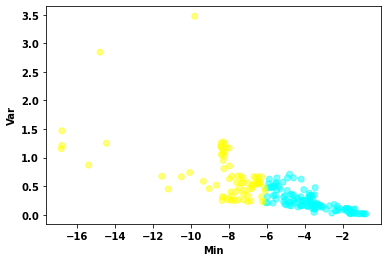

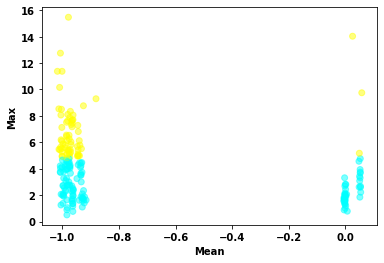

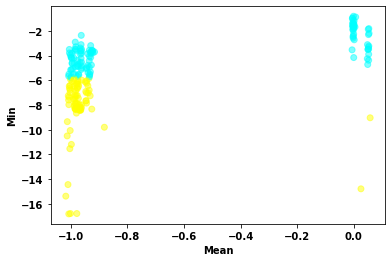

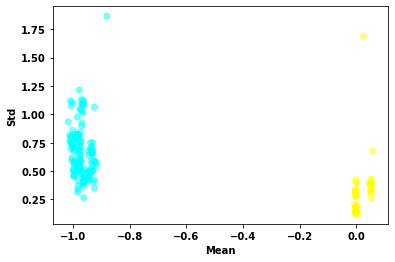

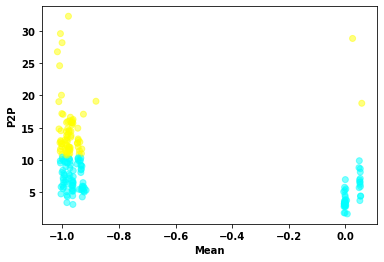

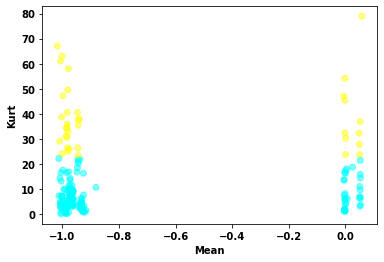

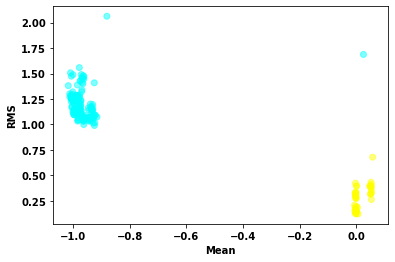

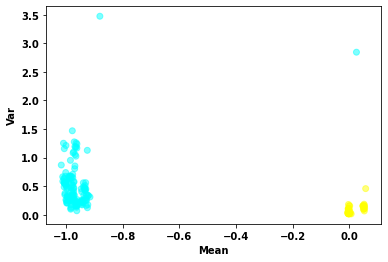

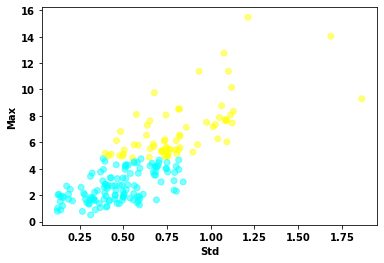

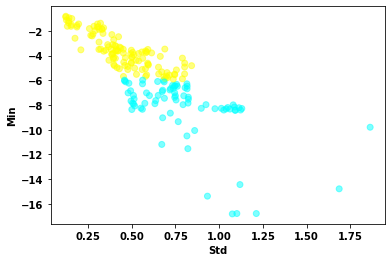

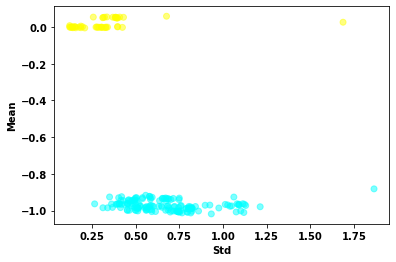

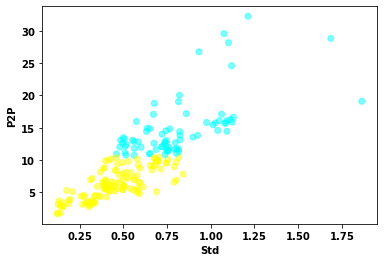

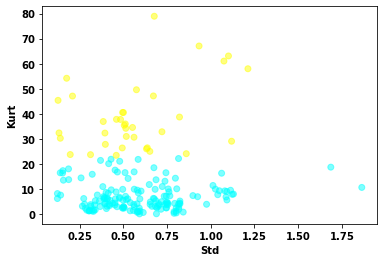

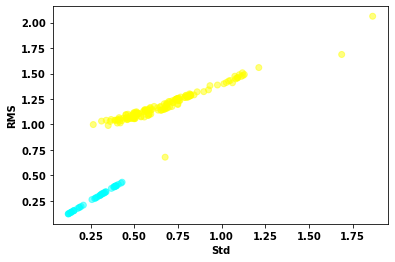

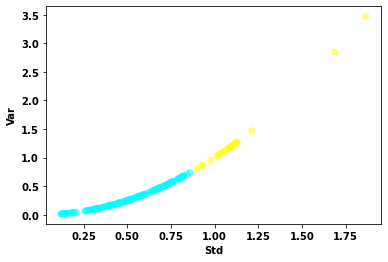

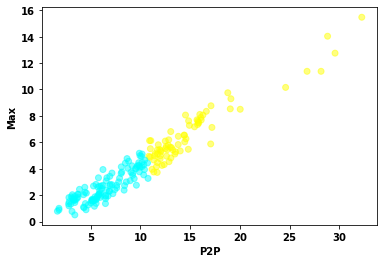

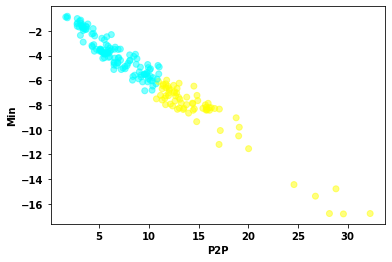

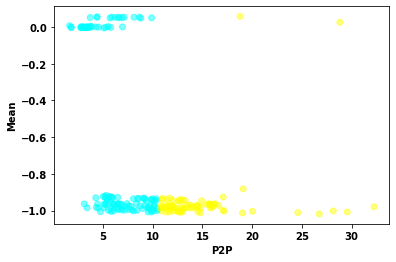

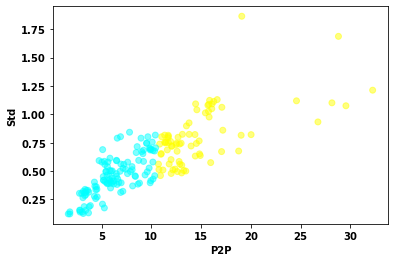

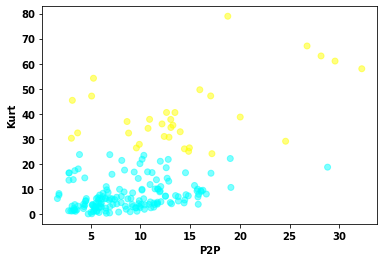

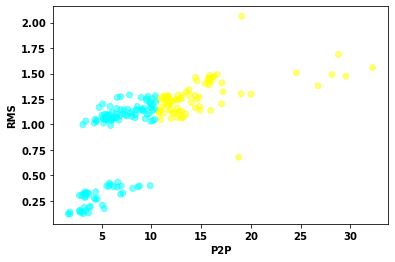

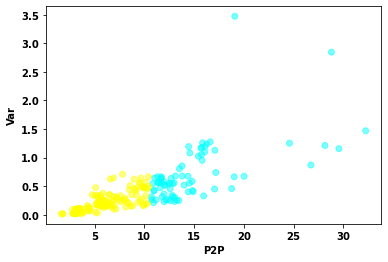

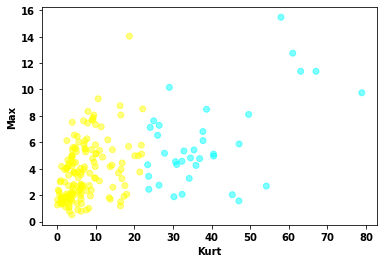

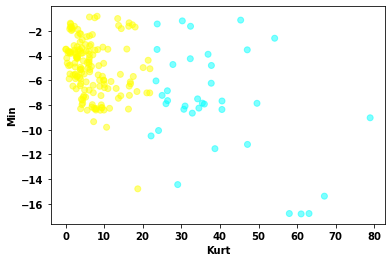

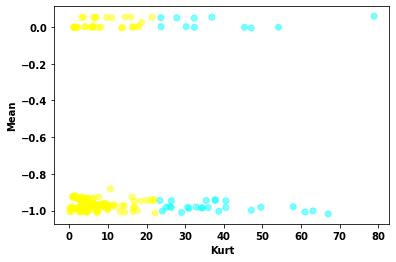

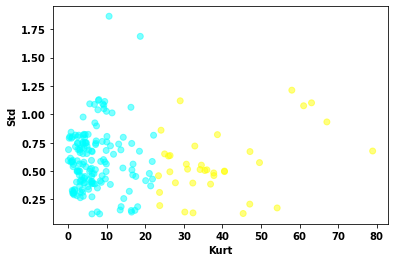

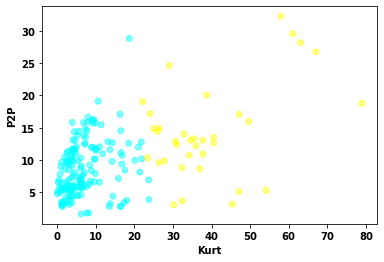

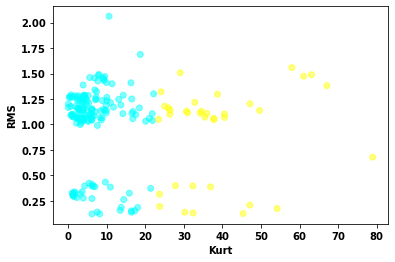

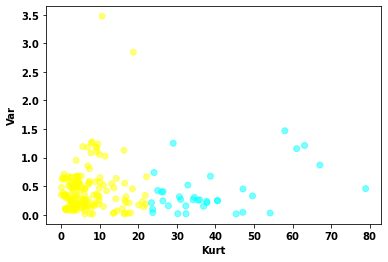

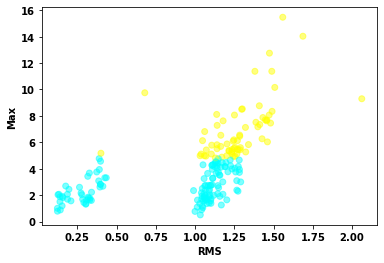

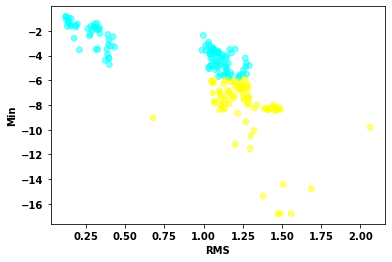

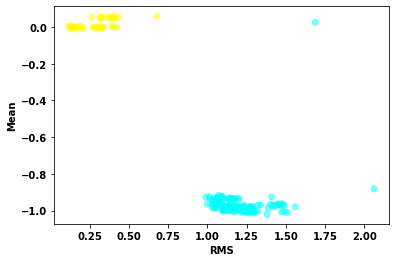

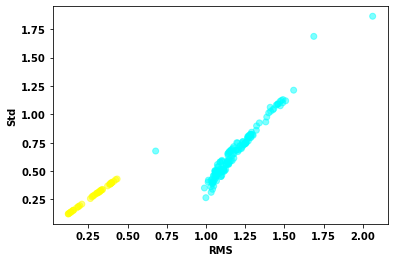

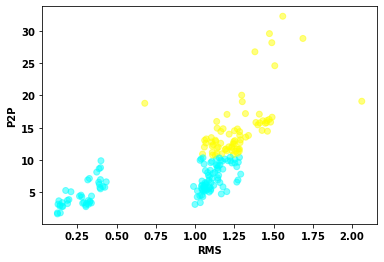

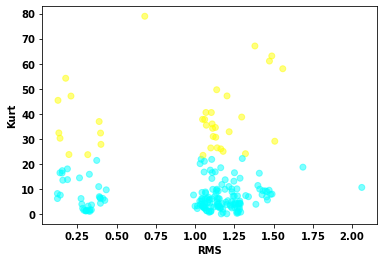

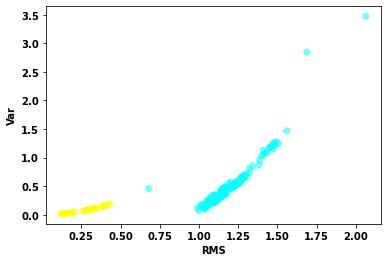

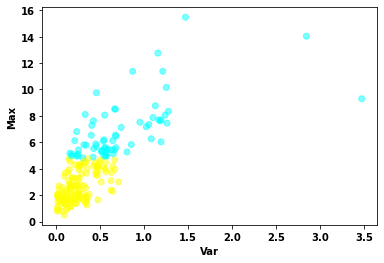

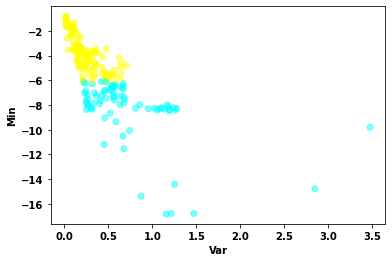

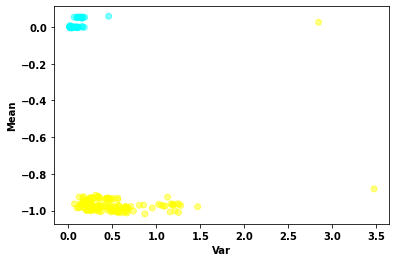

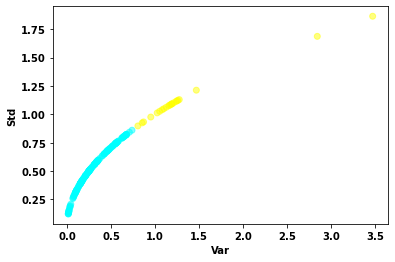

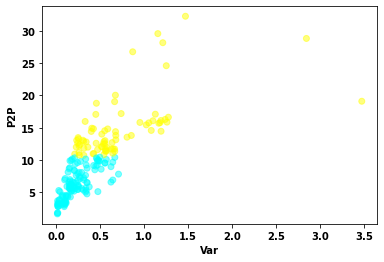

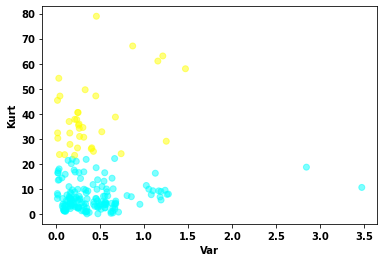

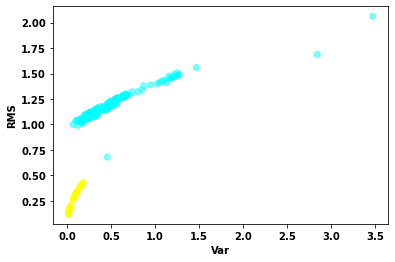

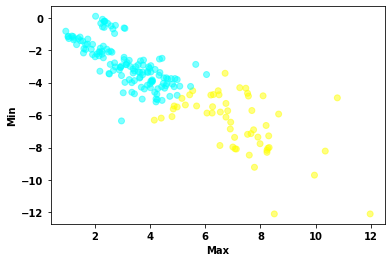

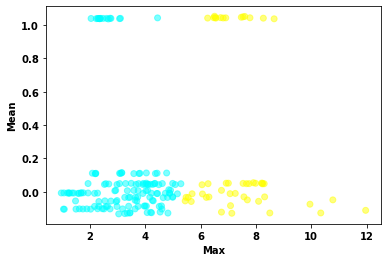

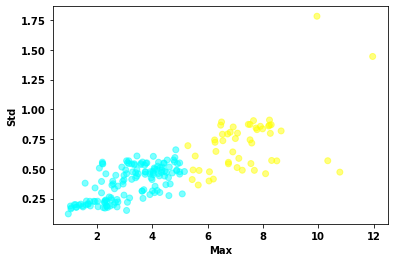

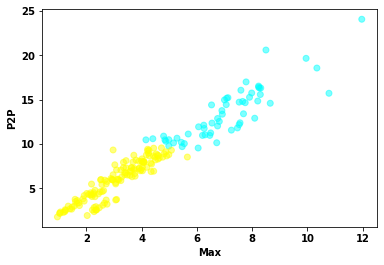

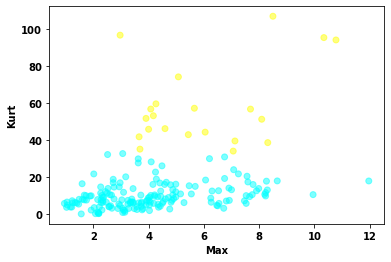

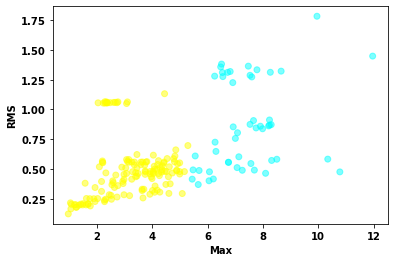

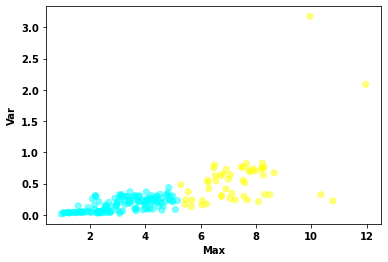

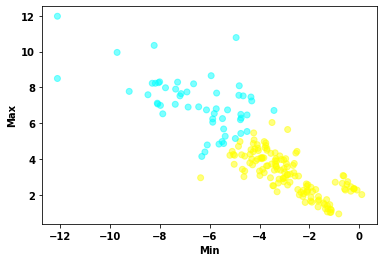

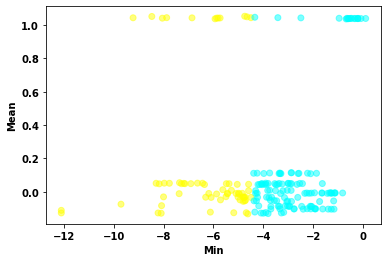

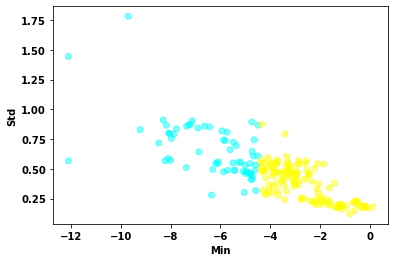

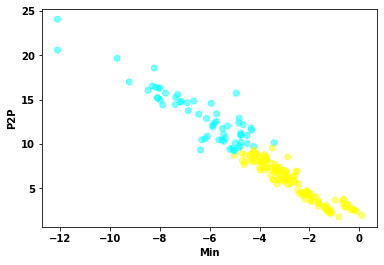

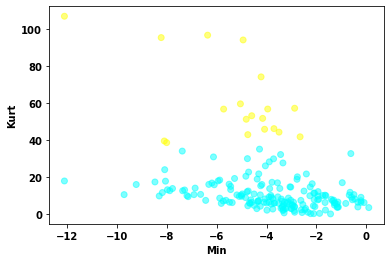

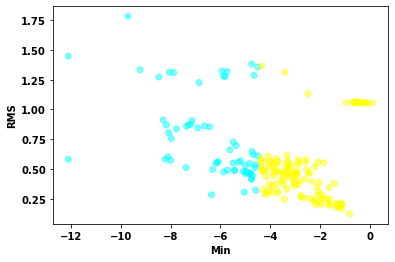

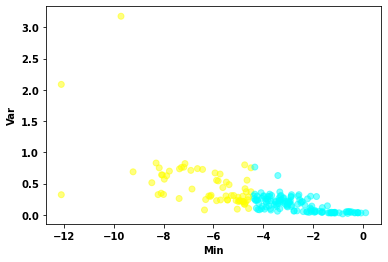

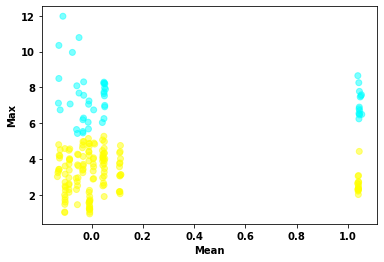

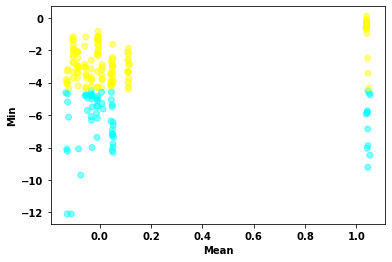

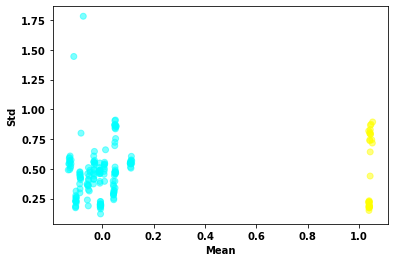

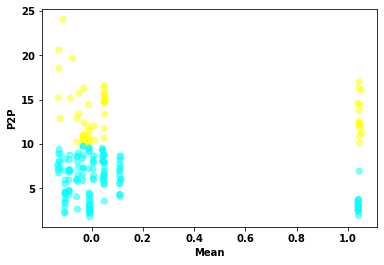

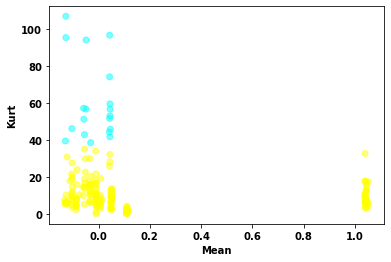

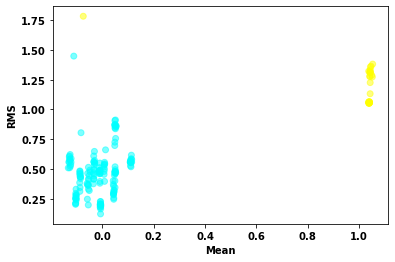

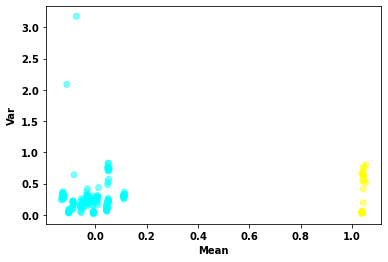

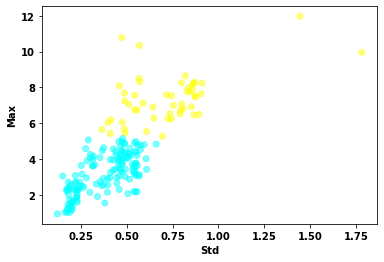

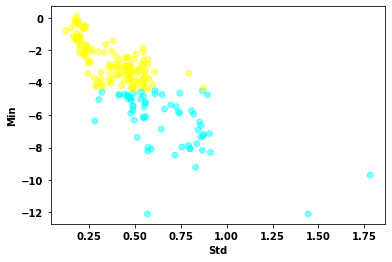

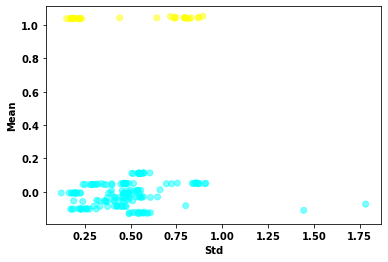

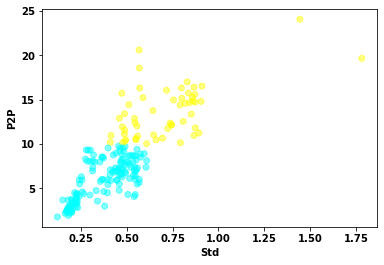

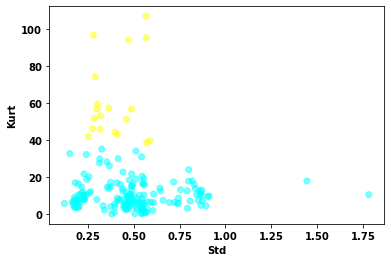

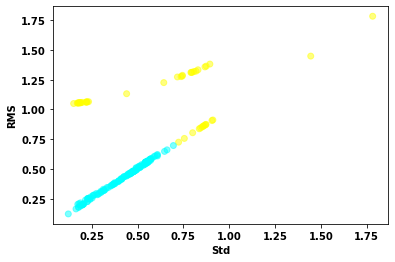

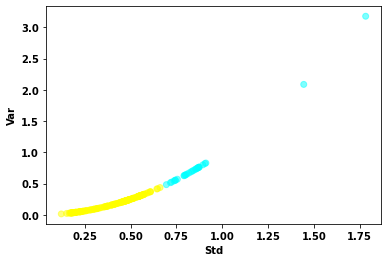

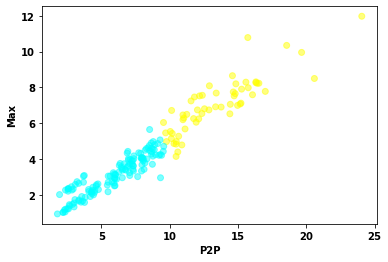

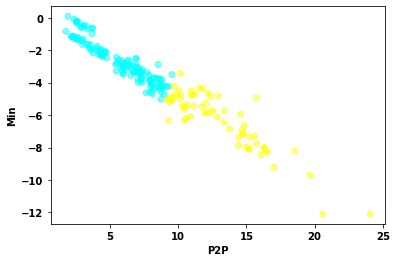

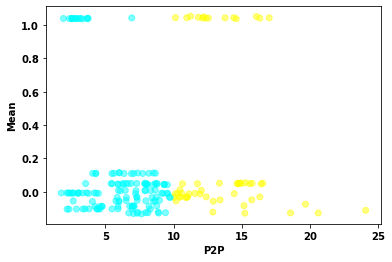

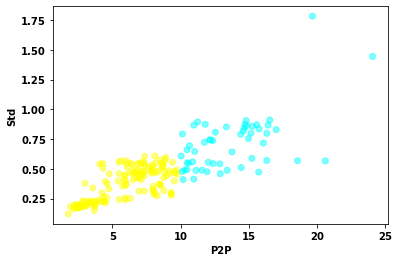

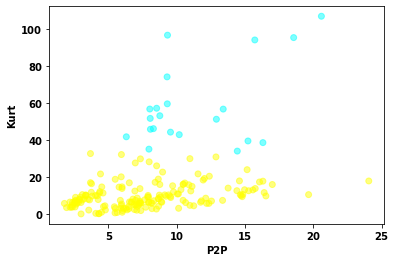

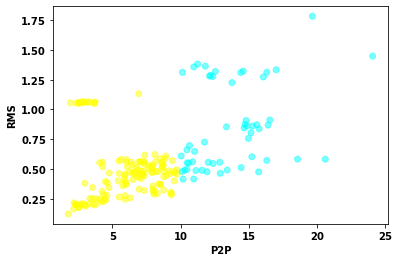

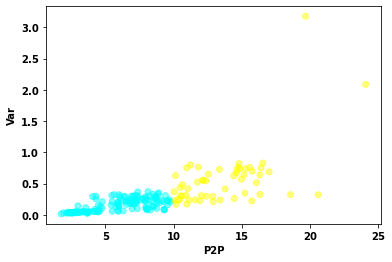

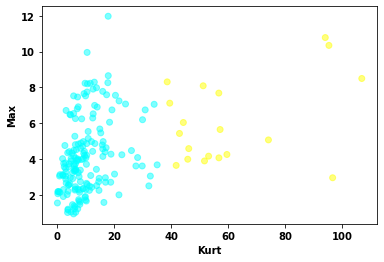

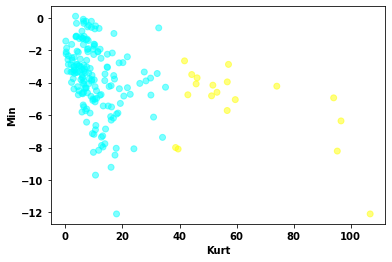

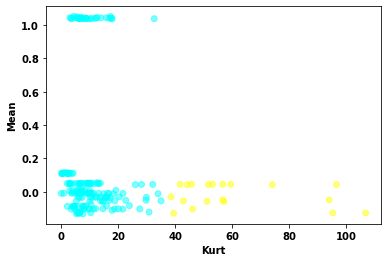

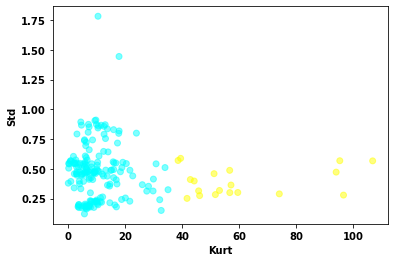

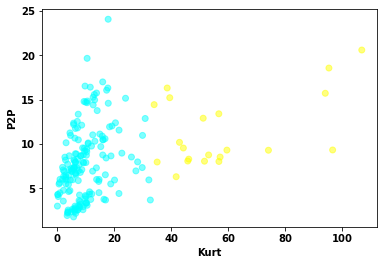

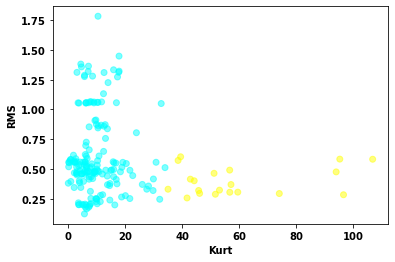

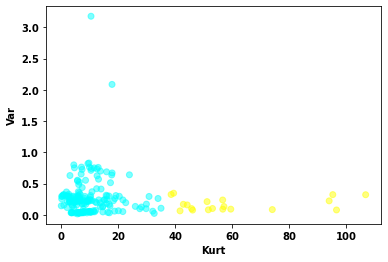

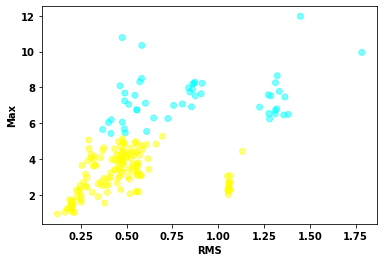

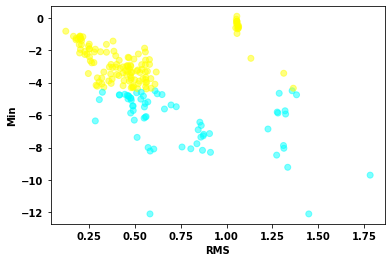

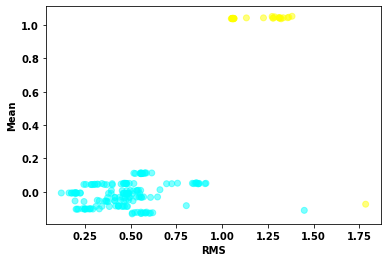

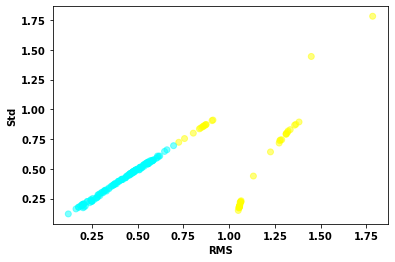

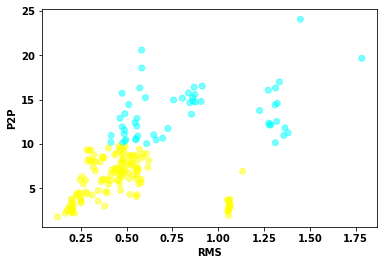

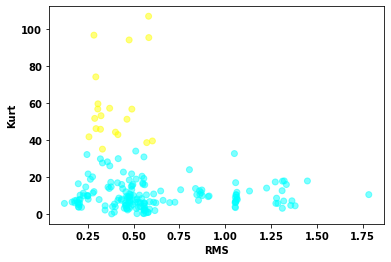

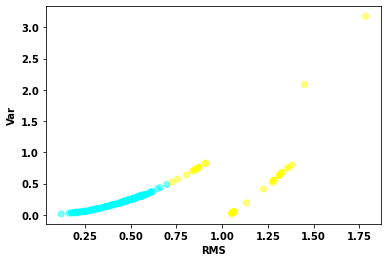

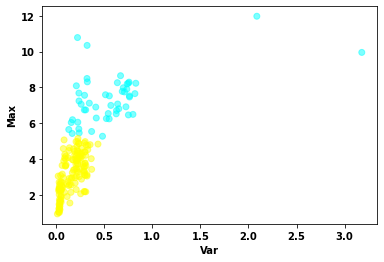

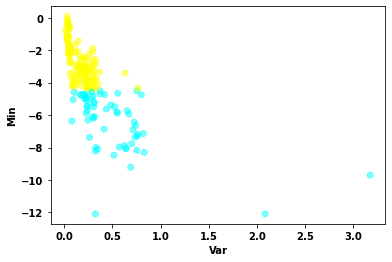

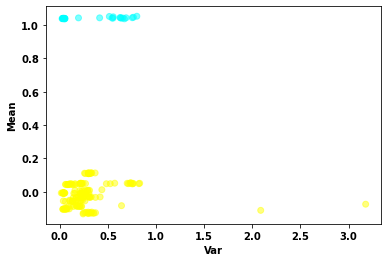

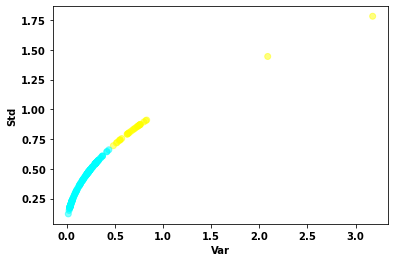

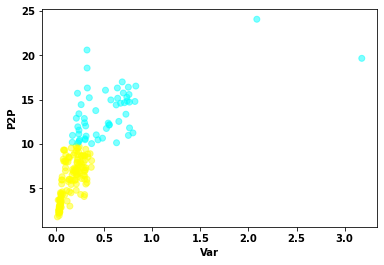

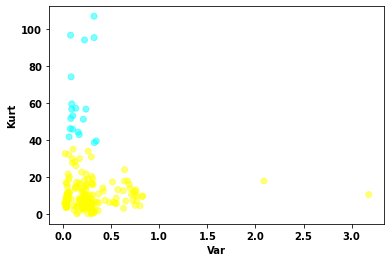

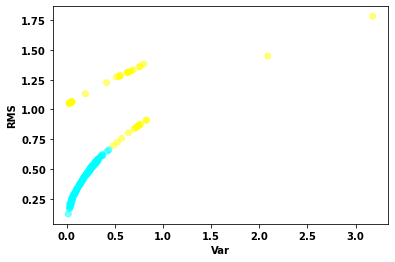

In [20]:
import matplotlib
colors = ['cyan','yellow']
for axis in ['X','Y','Z']:
    with PdfPages(axis +'_Tray_noTray-scaled.pdf') as pdf:
        for i in all_prosd.columns[3:]:
        #for i in ['RMS']:
            for j in all_prosd.columns[3:]:
                if i != j :
                    data = all_prosd[all_prosd.Axis == axis]
                    points_all = data[[i,j]].values
                    model_all = KMeans(n_clusters=2)
                    model_all.fit(points_all)
                    labels_all = model_all.predict(points_all)
                    plt.figure()
                    xs_all = points_all[:,0]
                    ys_all = points_all[:,1]
                    plt.xlabel(i)
                    plt.ylabel(j)
                    fig=plt.scatter(xs_all, ys_all,alpha=0.5, c=labels_all,cmap=matplotlib.colors.ListedColormap(colors)).get_figure()
                    pdf.savefig(fig)
                    #plt.savefig(i+' Vs '+j+'.png',dpi=200)



In [22]:
ds = all_prosd.describe()

In [29]:
ds.loc['min']

Max      0.453125
Min    -17.343750
Mean    -1.017944
Std      0.088630
P2P      1.078125
Kurt    -0.118013
RMS      0.095147
Var      0.007855
Name: min, dtype: float64